### 1.0 Leitura e importação 


In [115]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sn
import matplotlib.pyplot as plt

from datetime import date

In [116]:
df = pd.read_excel('https://query.data.world/s/jzwtbulr4ojqodlk45rmuvgrxfcgxo')
warnings.filterwarnings("ignore")

Na construção do dataframe, irei renomear e utilizar apenas algumas colunas que estão presentes no meu ambiente de atual, de forma que eu consiga interpretar e repssar essas informações durante o código e logo após, no readme do repositório no Github.

In [117]:
df = df.rename(columns = {
    'Sales Channel'	:'CANAL_VENDA',
    'OrderDate'	:'DATA_PEDIDO',
    'ShipDate' :'DATA_ENVIO',
    'DeliveryDate' :'DATA_ENTREGA',
    'ProcuredDate' :'DATA_ADQUIRIDA',
    '_StoreID' :'ID_LOJA',
    '_ProductID' :'ID_PRODUTO',
    'Order Quantity' :'QTD_PRODUTO',
    'Discount Applied' :'DESCONTO',
    'Unit Price' :'PRECO_UNICO',
    'Unit Cost' :'CUSTO_UNICO'
}
)

### 2.0 Tratamento de dados

Nos primeiros passos, precisamos saber quais colunas iremos utilizar, visualizar se existe ou não valores faltante e interpretar certas informações que definem quais tipos primitivos nosso dataframe possui ao longo das features.

In [118]:
df = df.drop(df[['OrderNumber','WarehouseCode','CurrencyCode','_SalesTeamID','_CustomerID']], axis=1)

In [119]:
df.isnull().sum()

CANAL_VENDA       0
DATA_ADQUIRIDA    0
DATA_PEDIDO       0
DATA_ENVIO        0
DATA_ENTREGA      0
ID_LOJA           0
ID_PRODUTO        0
QTD_PRODUTO       0
DESCONTO          0
PRECO_UNICO       0
CUSTO_UNICO       0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CANAL_VENDA     7991 non-null   object        
 1   DATA_ADQUIRIDA  7991 non-null   datetime64[ns]
 2   DATA_PEDIDO     7991 non-null   datetime64[ns]
 3   DATA_ENVIO      7991 non-null   datetime64[ns]
 4   DATA_ENTREGA    7991 non-null   datetime64[ns]
 5   ID_LOJA         7991 non-null   int64         
 6   ID_PRODUTO      7991 non-null   int64         
 7   QTD_PRODUTO     7991 non-null   int64         
 8   DESCONTO        7991 non-null   float64       
 9   PRECO_UNICO     7991 non-null   float64       
 10  CUSTO_UNICO     7991 non-null   float64       
dtypes: datetime64[ns](4), float64(3), int64(3), object(1)
memory usage: 686.9+ KB


In [121]:
df['ID_PRODUTO'] = df['ID_PRODUTO'].astype('string')

In [122]:
df.head()

,CANAL_VENDA,DATA_ADQUIRIDA,DATA_PEDIDO,DATA_ENVIO,DATA_ENTREGA,ID_LOJA,ID_PRODUTO,QTD_PRODUTO,DESCONTO,PRECO_UNICO,CUSTO_UNICO
0,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,259,12,5,0.075,1963.1,1001.181
1,Online,2017-12-31,2018-05-31,2018-06-22,2018-07-02,196,27,3,0.075,3939.6,3348.660
2,Distributor,2017-12-31,2018-05-31,2018-06-21,2018-07-01,213,16,1,0.050,1775.5,781.220
3,Wholesale,2017-12-31,2018-05-31,2018-06-02,2018-06-07,107,23,8,0.075,2324.9,1464.687
4,Distributor,2018-04-10,2018-05-31,2018-06-16,2018-06-26,111,26,8,0.100,1822.4,1476.144


In [123]:
df.tail()

,CANAL_VENDA,DATA_ADQUIRIDA,DATA_PEDIDO,DATA_ENVIO,DATA_ENTREGA,ID_LOJA,ID_PRODUTO,QTD_PRODUTO,DESCONTO,PRECO_UNICO,CUSTO_UNICO
7986,In-Store,2020-09-26,2020-12-30,2021-01-07,2021-01-14,339,29,1,0.075,234.5,121.940
7987,Online,2020-09-26,2020-12-30,2021-01-02,2021-01-04,202,3,6,0.050,3202.6,1921.560
7988,Online,2020-09-26,2020-12-30,2021-01-23,2021-01-26,241,35,5,0.200,3825.7,2792.761
7989,Online,2020-09-26,2020-12-30,2021-01-20,2021-01-25,112,36,8,0.100,1072.0,804.000
7990,In-Store,2020-09-26,2020-12-30,2021-01-13,2021-01-19,237,43,5,0.075,2211.0,1370.820


### 3.0 Feature Enginnering

* Na construção de indicadores de desempenho no varejo, desejo visualizar qual lucro a empresa terá por venda de um determinado produto, ou seja, a margem de lucro da diferença do preço pelo custo. 

* Será que o intervalo de envio de um produto entre o pedido e a entrega é impactada pelo Canal de venda que o cliente adquire uma compra? Poiser, teremos uma feature no qual conseguiremos olhar o intervalo de tempo da entrega do produto.

* Quando falamos de processos logísticos, os indicadores de Supply Chain serve para que posssamos entender quanto tempo o produto fica em depósito desde o processo de fabricação, ou melhor, de aquisoção do produto.

In [124]:
df['LUCRO_PRODUTO'] = df['PRECO_UNICO'] - df['CUSTO_UNICO']
df['INTERVALO_ENTREGA'] = df['DATA_ENTREGA'] - df['DATA_ENVIO']
df['SUPLLY_CHAIN'] = df['DATA_PEDIDO'] - df['DATA_ADQUIRIDA']
df['SAFRA'] = df['DATA_PEDIDO'].dt.strftime('%Y-%m')

In [125]:
df[['LUCRO_PRODUTO', 'INTERVALO_ENTREGA', 'SUPLLY_CHAIN', 'SAFRA']].head()

,LUCRO_PRODUTO,INTERVALO_ENTREGA,SUPLLY_CHAIN,SAFRA
0,961.919,5 days,151 days,2018-05
1,590.940,10 days,151 days,2018-05
2,994.280,10 days,151 days,2018-05
3,860.213,5 days,151 days,2018-05
4,346.256,10 days,51 days,2018-05


### 4.0 Visualização de dados

Para que possamos entender a viabilidade ou saúde dessa empresa de varejo, temo que olhar qual o faturamento dela, segmentar por canal de venda, visualizar quanto o cliente está disposto a pagar em respectivas lojas, isto é, entender carteira do cliente a partir do ticket médio e também analisar como a venda se comporta durante as safras, muito importante para que possamos levantar certas taxas percentuais.

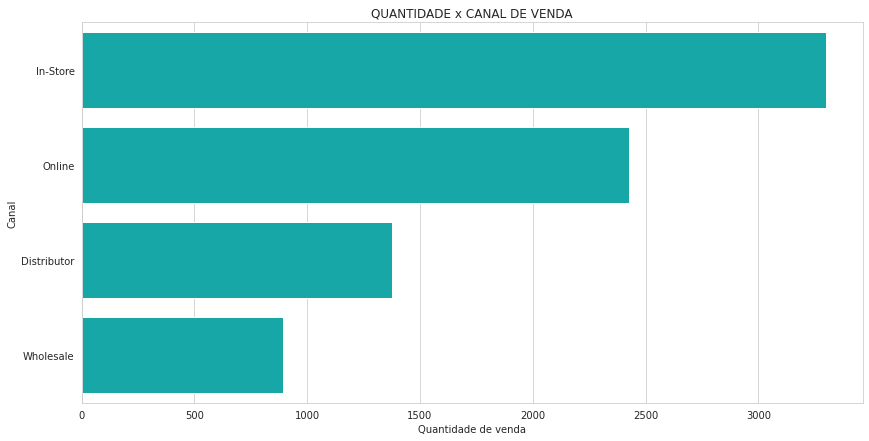

In [126]:
sn.set_style("whitegrid")
f, ax = plt.subplots(figsize=(14, 7))
sn.countplot(y="CANAL_VENDA", data=df, color="c")
ax.set_title('QUANTIDADE x CANAL DE VENDA', fontsize=12)
ax.set_xlabel('Quantidade de venda', fontsize=10)
ax.set_ylabel('Canal', fontsize=10)
ax

In [127]:
ranking_lojas = df.groupby("ID_LOJA").agg({
    'QTD_PRODUTO':'sum',
    'PRECO_UNICO':'sum',
}).reset_index().rename(columns={'ID_LOJA':'LOJA',
                                                                                       'QTD_PRODUTO':'QUANTIDADE TOTAL DE PRODUTOS',
                                                                                       'PRECO_UNICO':'MONTANTE'})
                                                                                    
ranking_lojas['TICKET_MEDIO'] = round(ranking_lojas['MONTANTE'] / ranking_lojas['QUANTIDADE TOTAL DE PRODUTOS'])
ranking_lojas = ranking_lojas.sort_values('MONTANTE',ascending = False).head(15)     
ranking_lojas                                                        

,LOJA,QUANTIDADE TOTAL DE PRODUTOS,MONTANTE,TICKET_MEDIO
25,26,178,93940.7,528.0
83,84,122,93525.3,767.0
137,138,111,92821.8,836.0
283,284,182,90510.3,497.0
244,245,130,87803.5,675.0
99,100,108,82865.6,767.0
20,21,155,81090.1,523.0
361,362,114,79348.1,696.0
134,135,120,77874.1,649.0
339,340,101,77438.6,767.0


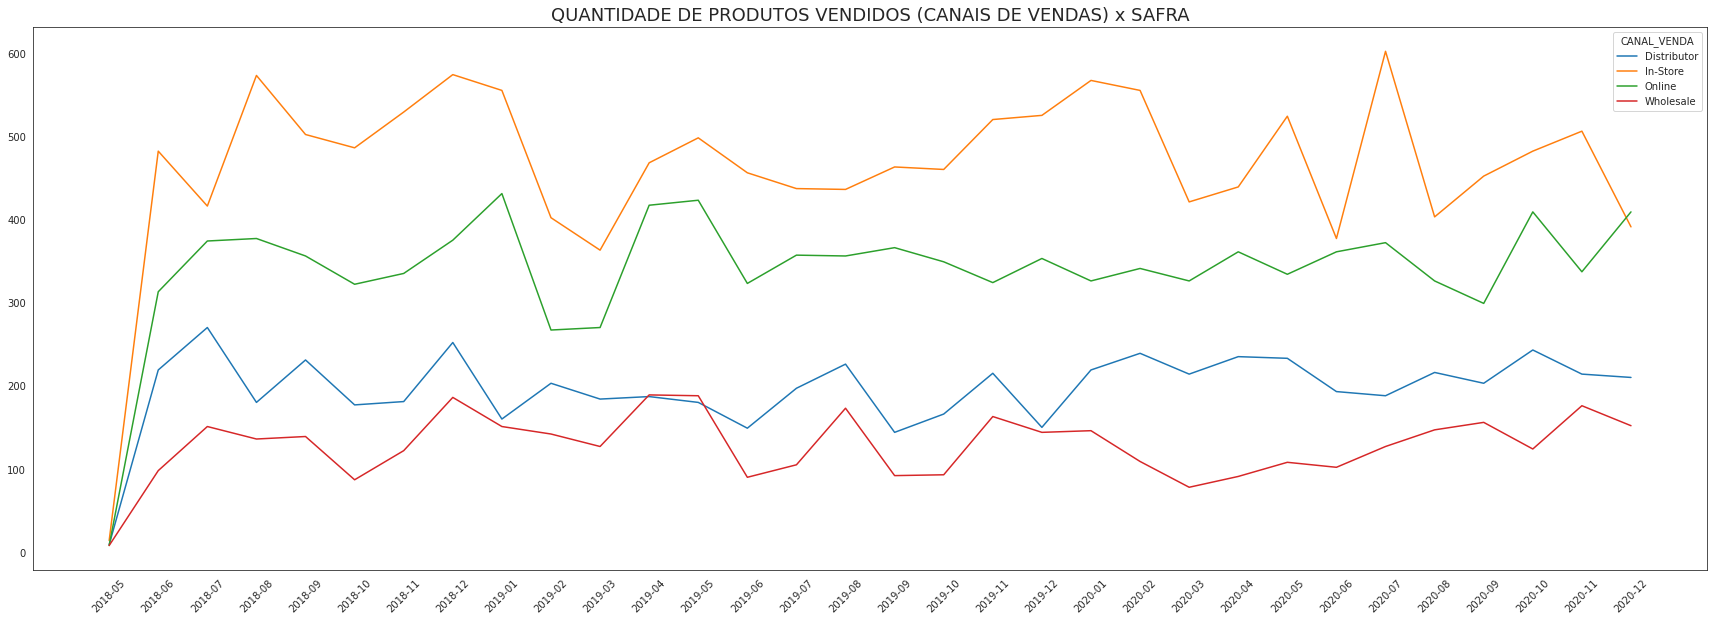

In [128]:
agrupamento_lucro = df.groupby(['CANAL_VENDA','SAFRA']).agg({'QTD_PRODUTO':'sum'}).sort_values('SAFRA')
sn.set_style("white")
fig = plt.figure(figsize=(30,10))
ax = sn.lineplot('SAFRA', 'QTD_PRODUTO', 
             hue='CANAL_VENDA', data=agrupamento_lucro, palette='tab10')
ax.set_title('QUANTIDADE DE PRODUTOS VENDIDOS (CANAIS DE VENDAS) x SAFRA', fontsize=18)
plt.xticks(rotation=45)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show();

In [129]:
def cria_variacao(dataframe, coluna, nova_coluna):
  lista_variacao = []
  for i in range(len(dataframe[coluna])):
    if i == 0:
      lista_variacao.append(0)
    else:
      variacao = (dataframe[coluna][i] - dataframe[coluna][i-1]) / dataframe[coluna][i-1]
      lista_variacao.append("{:.2f}".format(variacao))
  dataframe[nova_coluna] = pd.Series(lista_variacao).astype("float")

In [130]:
tabela_originacao = df.groupby('SAFRA').agg({'DATA_PEDIDO':'count',
                                             'CUSTO_UNICO':'sum',
                                             'LUCRO_PRODUTO':'sum'}).rename(columns={'DATA_PEDIDO':'QTD_CONTRATOS','CUSTO_UNICO':'ORIGINACAO','LUCRO_PRODUTO':'RECEITA'}).sort_values('SAFRA').reset_index()

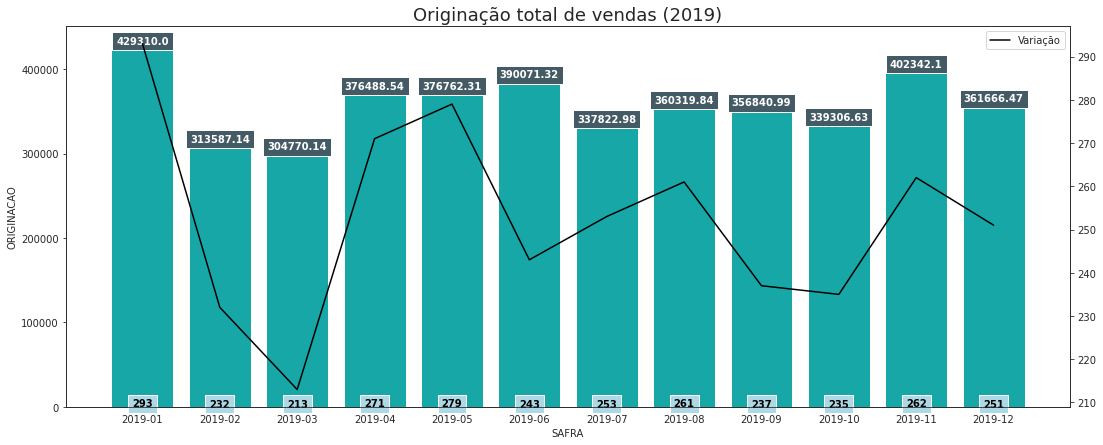

In [131]:
segundo_ano = tabela_originacao[tabela_originacao['SAFRA'].between('2019-01','2019-12')].reset_index()
cria_variacao(segundo_ano, 'QTD_CONTRATOS', 'VARIACAO_QTD')

sn.set_style("white")
f, ax = plt.subplots(figsize=(18, 7))
ax = sn.barplot(x='SAFRA', y='ORIGINACAO', data=segundo_ano, color = 'c')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), segundo_ano.QTD_CONTRATOS, color='black')
for index, row in segundo_ano.iterrows():
    ax.text(row.name,row.ORIGINACAO,
            round(row.ORIGINACAO,2),
            ha="center",
            fontweight='bold', 
            size=10,
            color='white',
            bbox=dict(facecolor='#445A64'))
    
ax.set_title('Originação total de vendas (2019)', fontsize=18)
for index, row in segundo_ano.iterrows():
    ax.text(row.name,row.QTD_CONTRATOS,
            round(row.QTD_CONTRATOS,2),
            ha="center",
            fontweight='bold', 
            size=10,
            color='black',
            bbox=dict(facecolor='#ADD8E6'))
plt.legend(['Variação'])
plt.show()

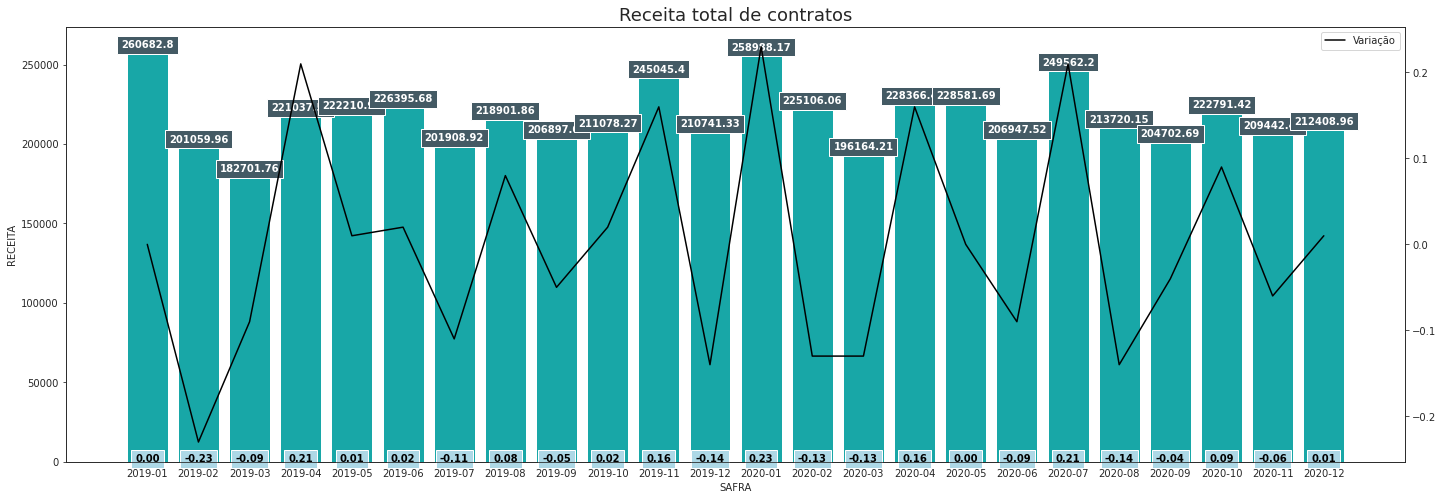

In [132]:
receita_total = tabela_originacao[tabela_originacao['SAFRA'].between('2019-01','2020-12')].reset_index()
cria_variacao(receita_total, 'RECEITA', 'VARIACAO_RECEITA')

sn.set_style("white")
f, ax = plt.subplots(figsize=(24, 8))
ax = sn.barplot(x='SAFRA', y='RECEITA', data=receita_total, color = 'c')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), receita_total.VARIACAO_RECEITA, color='black')
for index, row in receita_total.iterrows():
    ax.text(row.name,row.RECEITA,
            round(row.RECEITA,2),
            ha="center",
            fontweight='bold', 
            size=10,
            color='white',
            bbox=dict(facecolor='#445A64'))
    
ax.set_title('Receita total de contratos', fontsize=18)
for index, row in receita_total.iterrows():
    ax.text(row.name,row.VARIACAO_RECEITA,
            "{:.2f}".format(row.VARIACAO_RECEITA),
            ha="center",
            fontweight='bold', 
            size=10,
            color='black',
            bbox=dict(facecolor='#ADD8E6'))
plt.legend(['Variação'])
plt.show()

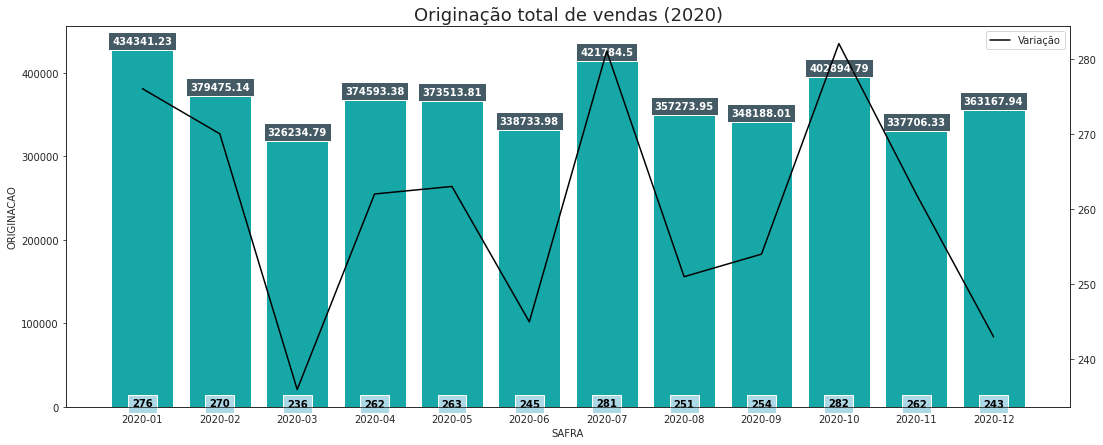

In [133]:
terceiro_ano = tabela_originacao[tabela_originacao['SAFRA'].between('2020-01','2020-12')].reset_index()
cria_variacao(terceiro_ano, 'QTD_CONTRATOS', 'VARIACAO_QTD')

sn.set_style("white")
f, ax = plt.subplots(figsize=(18, 7))
ax = sn.barplot(x='SAFRA', y='ORIGINACAO', data=terceiro_ano, color = 'c')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), terceiro_ano.QTD_CONTRATOS, color='black')
for index, row in terceiro_ano.iterrows():
    ax.text(row.name,row.ORIGINACAO,
            round(row.ORIGINACAO,2),
            ha="center",
            fontweight='bold', 
            size=10,
            color='white',
            bbox=dict(facecolor='#445A64'))
    
ax.set_title('Originação total de vendas (2020)', fontsize=18)
for index, row in terceiro_ano.iterrows():
    ax.text(row.name,row.QTD_CONTRATOS,
            round(row.QTD_CONTRATOS,2),
            ha="center",
            fontweight='bold', 
            size=10,
            color='black',
            bbox=dict(facecolor='#ADD8E6'))
plt.legend(['Variação'])
plt.show()

Supondo que, no mês de agosto de 2018 foi implantado na empresa novos canais de marketing que visa ampliar a comunicação da empresa com o público do interior do Estado que a empresa se encontra. Dessa forma, desejamos saber se a partir da implantação, realizada no dia 11 de agosto de 2020, ampliou-se a quantidade de vendas ou aumento do poder de compra.

In [134]:
#implantação -> 2018-08-11 - 2018-09-09
#antes       -> 2018-07-12 - 2018-08-10

df['STATUS'] = np.nan
df['STATUS'][df.loc[(df['DATA_PEDIDO'] >= pd.to_datetime('2018-08-11')) & (df['DATA_PEDIDO'] <= pd.to_datetime('2018-09-09'))].index] = 'DEPOIS'
df['STATUS'][df.loc[(df['DATA_PEDIDO'] >= pd.to_datetime('2018-07-12')) & (df['DATA_PEDIDO'] <= pd.to_datetime('2018-08-10'))].index] = 'ANTES'
tabela_taxas = df.dropna()

tabela_taxas = tabela_taxas.groupby("STATUS").agg({
    'QTD_PRODUTO':'sum',
    'PRECO_UNICO':'sum',
}).reset_index().rename(columns={'QTD_PRODUTO':'QTD VENDIDOS', 'PRECO_UNICO':'MONTANTE'})
                                                                                    
tabela_taxas['TICKET_MEDIO'] = round(tabela_taxas['MONTANTE'] / tabela_taxas['QTD VENDIDOS'])
tabela_taxas['MONTANTE EMPRESA'] = df['PRECO_UNICO'].sum()
tabela_taxas['QUANTIDADE EMPRESA'] = df['QTD_PRODUTO'].sum()
tabela_taxas['PERCENTUAL_VALOR'] = tabela_taxas['TICKET_MEDIO']/tabela_taxas['MONTANTE EMPRESA']
tabela_taxas['PERCENTUAL_QTD'] = tabela_taxas['QTD VENDIDOS']/tabela_taxas['QUANTIDADE EMPRESA']

In [135]:
display(tabela_taxas) 

,STATUS,QTD VENDIDOS,MONTANTE,TICKET_MEDIO,MONTANTE EMPRESA,QUANTIDADE EMPRESA,PERCENTUAL_VALOR,PERCENTUAL_QTD
0,ANTES,1211,641592.0,530.0,18255731.2,36162,0.000029,0.033488
1,DEPOIS,1149,549473.7,478.0,18255731.2,36162,0.000026,0.031774


In [136]:
print(f"Percentual montante após implantação {round((0.000029 / 0.000026)-1, 2)}%")
print(f"Percentual quantidade de venda após implantação {round((0.033488 / 0.031774)-1, 2)}%")

Percentual montante após implantação 0.12%
Percentual quantidade de venda após implantação 0.05%
